## Import all packages

In [4]:
import pandas as pd
import numpy as np 
import scipy
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from sklearn.cluster import KMeans

## Import data

In [5]:
df = pd.read_csv("../data/segmentation_data.csv",index_col=0)

## Explore data

In [6]:
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Correlation

Text(0.5, 1.0, 'Correlation Heatmap')

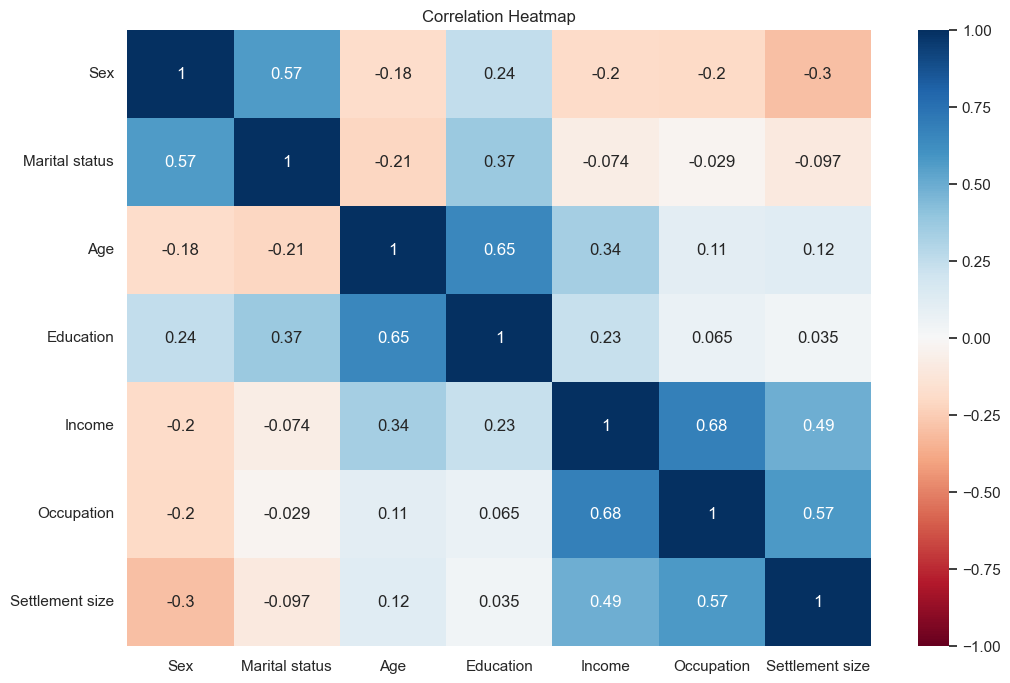

In [7]:
plt.figure(figsize=(12,8))
sb.heatmap(df.corr(),annot=True,
           cmap='RdBu',
           vmax=1,
           vmin=-1)
plt.title("Correlation Heatmap")

## Visualize raw data

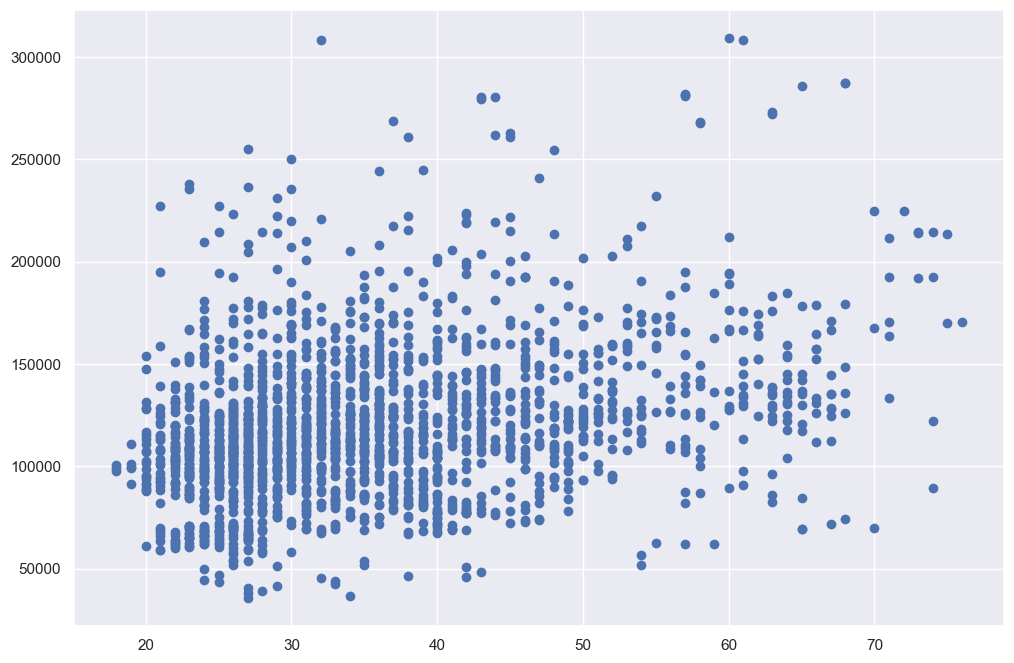

In [8]:

plt.figure(figsize=(12,8))
plt.scatter(df['Age'],df['Income'])

## Standardization

In [9]:
scaler = StandardScaler()

In [13]:
df_std = scaler.fit_transform(df)

## K-means clustering

In [14]:
from sklearn.cluster import KMeans

### Define number of clusters

/Users/megha/Documents/Megha/Projects/Clustering/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/megha/Documents/Megha/Projects/Clustering/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


14000.000000000004
10514.382935262664


/Users/megha/Documents/Megha/Projects/Clustering/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/megha/Documents/Megha/Projects/Clustering/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8631.672547949462
7169.870822465848
6403.070166206633


/Users/megha/Documents/Megha/Projects/Clustering/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/megha/Documents/Megha/Projects/Clustering/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5830.970596689665
5369.740062786459


/Users/megha/Documents/Megha/Projects/Clustering/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/megha/Documents/Megha/Projects/Clustering/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4968.550183545797


/Users/megha/Documents/Megha/Projects/Clustering/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4610.780075823513


/Users/megha/Documents/Megha/Projects/Clustering/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4337.429056435243


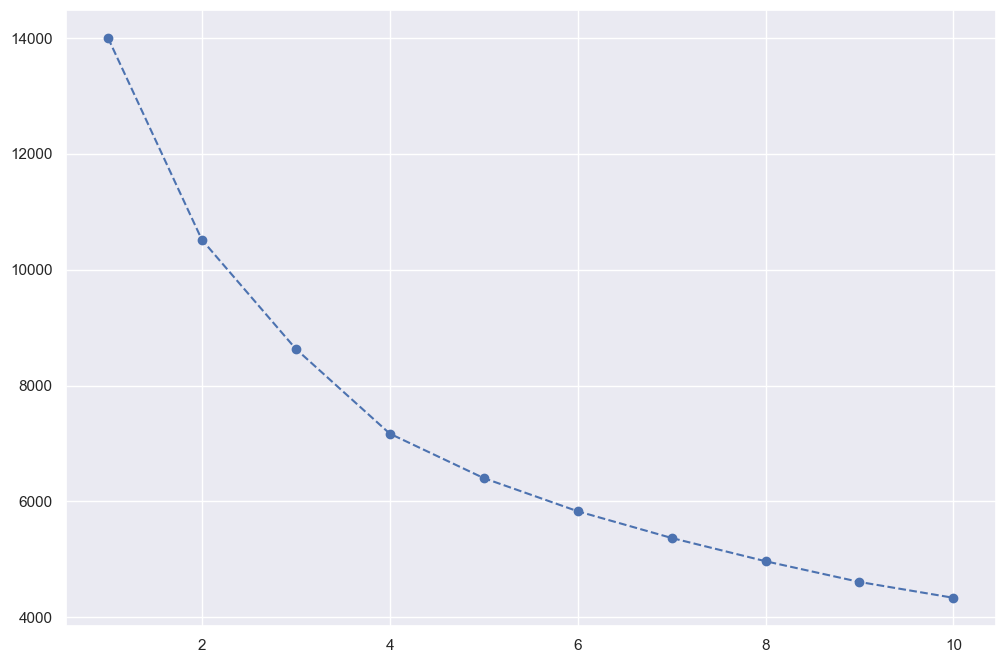

In [15]:
wcss = []
X=df_std
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42,init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
    
    
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss,marker='o', linestyle='dashed')
plt.show()


## Clustring

In [16]:
X=df_std

In [17]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

/Users/megha/Documents/Megha/Projects/Clustering/.venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [19]:

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

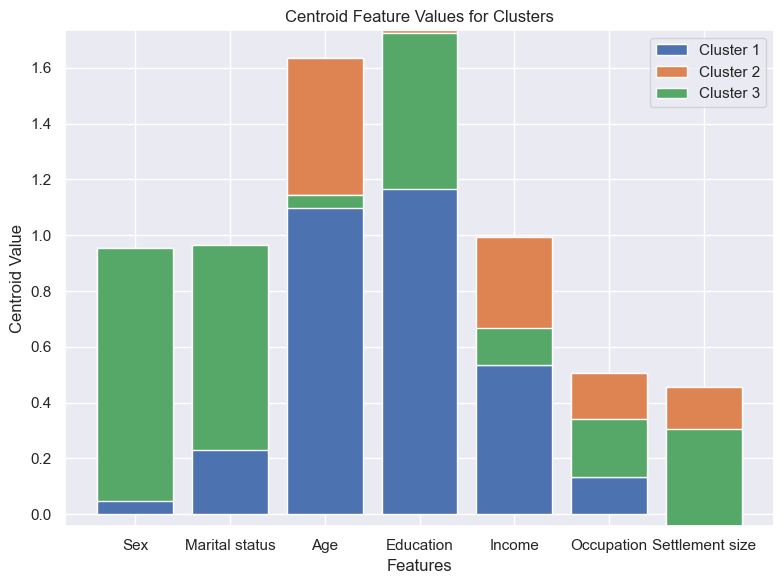

In [20]:
# Plot centroid feature values
plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), centroids[0], label='Cluster 1')
plt.bar(range(X.shape[1]), centroids[1], label='Cluster 2', bottom=centroids[0])
plt.bar(range(X.shape[1]), centroids[2], label='Cluster 3', bottom=centroids[0] + centroids[1])
plt.xlabel('Features')
plt.ylabel('Centroid Value')
plt.title('Centroid Feature Values for Clusters')
plt.xticks(range(X.shape[1]), df.columns)
plt.legend()
plt.tight_layout()
plt.show()

### Segment analysis

In [18]:
df_segm_kmeans = df.copy()
df_segm_kmeans["Segment K-means"] = kmeans.labels_

In [19]:
df_segm_analysis = df_segm_kmeans.groupby("Segment K-means").mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
1,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [26]:
df_segm_analysis["No Obs"]=df_segm_kmeans[["Segment K-means","Sex"]].groupby("Segment K-means").count()
df_segm_analysis

In [29]:
df_segm_analysis["Prop obs"] = df_segm_analysis["No Obs"]/df_segm_analysis["No Obs"].sum()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No Obs,Prop obs
Segment K-means,,,,,,,,,
0,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
1,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [30]:
df_segm_analysis.rename({0:"Fewer Opportunities",1:"Well off",2:"Career Oriented",3:"Standard"})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,No Obs,Prop obs
Segment K-means,,,,,,,,,
Fewer Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Well off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Career Oriented,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [31]:
df_segm_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,1
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,0
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,0
100001997,1,1,27,1,117744,1,0,3
100001998,0,0,31,0,86400,0,0,0


In [37]:
df_segm_kmeans["Labels"] = df_segm_kmeans['Segment K-means'].map({0:"Fewer Opportunities",1:"Well off",2:"Career Oriented",3:"Standard"})

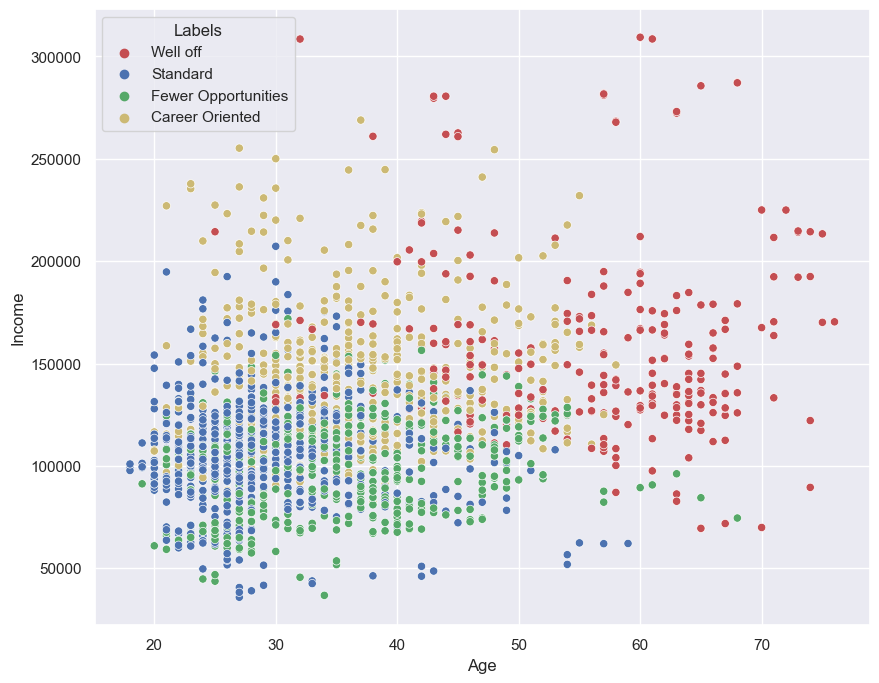

In [39]:
plt.figure(figsize=(10,8))
sb.scatterplot(x=df_segm_kmeans["Age"],y =df_segm_kmeans["Income"],hue=df_segm_kmeans["Labels"],palette=["r", "b", "g","y"])
plt.show()

## Approach 1: 
### Finding Absolute difference of  each cluster centroid and mean of features.Helps in understanding how each individual feature contributed to the uniquesness of each cluster seperately

Cluster 1 - Top 3 important features:
- Income
- Age
- Education

Cluster 2 - Top 3 important features:
- Settlement size
- Marital status
- Sex

Cluster 3 - Top 3 important features:
- Education
- Marital status
- Sex



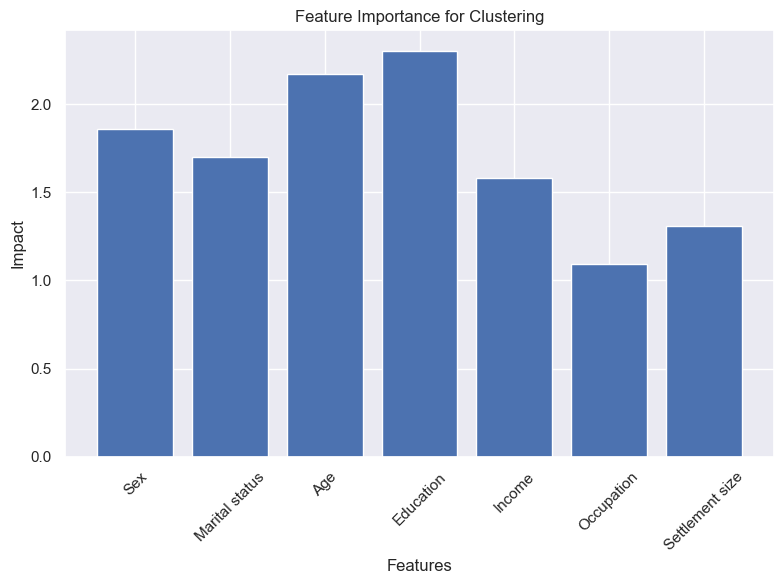

In [128]:
mean_feature_values = np.mean(X, axis=0)
centroid_diff = centroids - mean_feature_values
centroid_importance = np.abs(centroid_diff)
num_top_features = 3
top_features_indices = np.argsort(centroid_importance, axis=1)[:, -num_top_features:]
feature_names = df.columns

for cluster_idx in range(n_clusters):
    print(f"Cluster {cluster_idx + 1} - Top {num_top_features} important features:")
    for feature_idx in top_features_indices[cluster_idx]:
        print(f"- {feature_names[feature_idx]}")
    print()
    
feature_importance_scores = np.sum(np.abs(centroid_diff), axis=0)
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importance_scores)
plt.xlabel('Features')
plt.ylabel('Impact')
plt.title('Feature Importance for Clustering')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
    

### Optimal way to choose the important features 

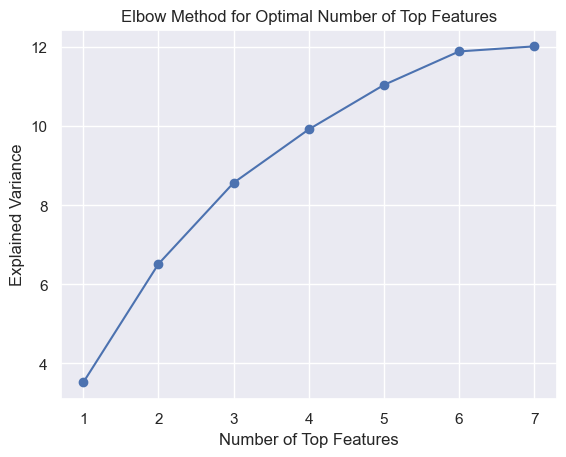

In [130]:
# Calculate explained variance for different numbers of features
explained_variance = []
num_features_range = range(1, X.shape[1] + 1)
for num_features in num_features_range:
    top_features_indices = np.argsort(centroid_importance, axis=1)[:, -num_features:]
    explained_variance.append(np.sum(centroid_importance[np.arange(n_clusters)[:, np.newaxis], top_features_indices]))

# Plot the explained variance
plt.plot(num_features_range, explained_variance, marker='o')
plt.xlabel('Number of Top Features')
plt.ylabel('Explained Variance')
plt.title('Elbow Method for Optimal Number of Top Features')
plt.show()

## Approach 2
### Considering all the clusters while comapring with each feature
### It gives collective view of how features contributing to overall clusters

In [132]:
# Calculate sum of centroids and mean feature values
sum_of_centroids = np.sum(centroids, axis=0)
mean_feature_values = np.mean(X, axis=0)

# Compute differences
differences = sum_of_centroids - mean_feature_values

# Rank features based on differences
feature_ranking = np.argsort(np.abs(differences))[::-1]

# Print ranked features
print("Ranking of features based on differences:")
for rank, feature_idx in enumerate(feature_ranking):
    print(f"{rank + 1}.  {feature_names[feature_idx]}: {differences[feature_idx]}")


Ranking of features based on differences:
1.  Education: 1.1650341122041743
2.  Age: 1.0989693103228149
3.  Income: 0.6670067687021851
4.  Occupation: 0.34115628921848895
5.  Settlement size: 0.30671949152882677
6.  Marital status: 0.22861134415869294
7.  Sex: 0.048418736166062765
